In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_filename = '/content/drive/MyDrive/Data Stock/data_with_features.csv'

In [3]:
df = pd.read_csv(input_filename, low_memory=False)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
print(sorted(df.columns))

['52WeekChange', 'ATRr_14', 'Adj Close', 'BBB_20_2.0_2.0', 'BBL_20_2.0_2.0', 'BBM_20_2.0_2.0', 'BBP_20_2.0_2.0', 'BBU_20_2.0_2.0', 'Close', 'Date', 'Dividends', 'EMA_20', 'EMA_50', 'GICS Sector', 'High', 'Low', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'Month', 'OBV', 'Open', 'RSI_14', 'Stock Splits', 'Symbol', 'Volume', 'Weekday', 'averageVolume', 'beta', 'daily_return', 'daily_return_lag_1', 'daily_return_lag_2', 'daily_return_lag_3', 'daily_return_lag_4', 'daily_return_lag_5', 'enterpriseToRevenue', 'forwardEps', 'forwardPE', 'marketCap', 'payoutRatio', 'priceToBook', 'profitMargins', 'relative_volume', 'return_vs_sector', 'risk_adjusted_return', 'trailingEps']


# SEASONALITY ANALYSIS

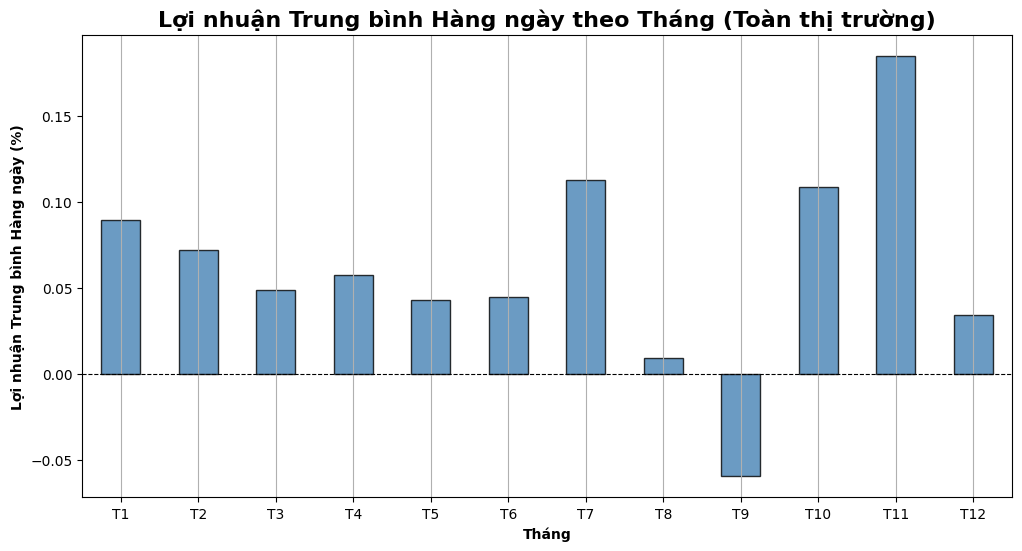

In [5]:
# A. Lợi nhuận trung bình theo Tháng
df['Month'] = df['Date'].dt.month
monthly_returns = df.groupby('Month')['daily_return'].mean() * 100

plt.figure(figsize=(12, 6))
monthly_returns.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Lợi nhuận Trung bình Hàng ngày theo Tháng (Toàn thị trường)', fontsize=16, fontweight='bold')
plt.xlabel('Tháng', fontweight='bold')
plt.ylabel('Lợi nhuận Trung bình Hàng ngày (%)', fontweight='bold')
plt.xticks(ticks=range(12), labels=['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12'], rotation=0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x')
plt.show()

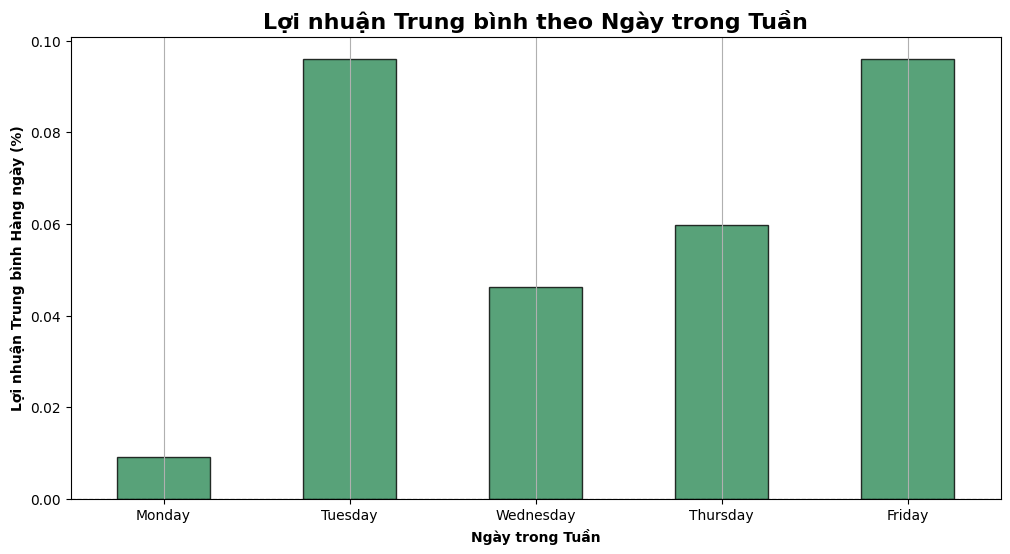

In [6]:
# B. Lợi nhuận trung bình theo Ngày trong Tuần
df['Weekday'] = df['Date'].dt.day_name()
weekday_returns = df.groupby('Weekday')['daily_return'].mean() * 100

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_returns = weekday_returns.reindex(weekday_order)

plt.figure(figsize=(12, 6))
weekday_returns.plot(kind='bar', color='seagreen', edgecolor='black', alpha=0.8)
plt.title('Lợi nhuận Trung bình theo Ngày trong Tuần', fontsize=16, fontweight='bold')
plt.xlabel('Ngày trong Tuần', fontweight='bold')
plt.ylabel('Lợi nhuận Trung bình Hàng ngày (%)', fontweight='bold')
plt.xticks(rotation=0)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x')
plt.show()

# PHÂN TÍCH KỸ THUẬT SÂU CHO MỘT CỔ PHIẾU

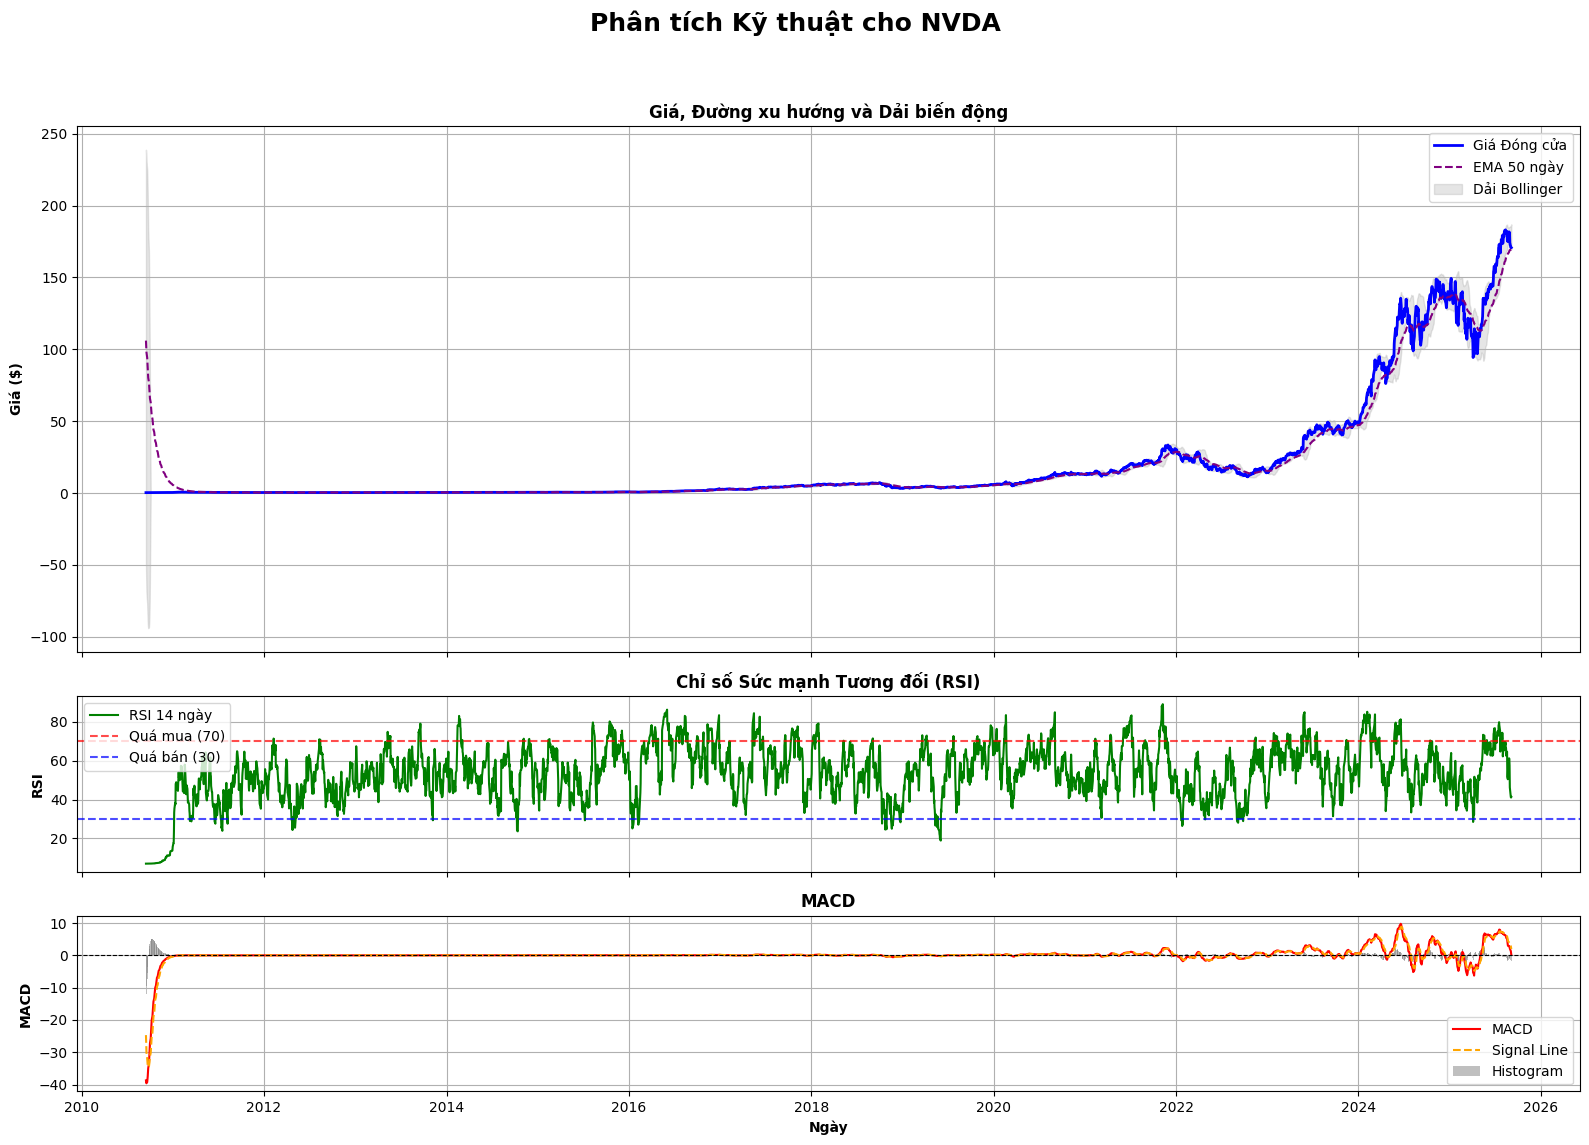

In [9]:
df_nvda = df[df['Symbol'] == 'NVDA'].copy()

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})
fig.suptitle('Phân tích Kỹ thuật cho NVDA', fontsize=18, fontweight='bold')

# Subplot 1: Giá và các chỉ báo Trend/Volatility
axes[0].plot(df_nvda['Date'], df_nvda['Close'], label='Giá Đóng cửa', color='blue', linewidth=2)
axes[0].plot(df_nvda['Date'], df_nvda['EMA_50'], label='EMA 50 ngày', color='purple', linestyle='--')
axes[0].fill_between(
    df_nvda['Date'],
    df_nvda['BBL_20_2.0_2.0'],
    df_nvda['BBU_20_2.0_2.0'],
    color='gray',
    alpha=0.2,
    label='Dải Bollinger'
)
axes[0].set_ylabel('Giá ($)', fontweight='bold')
axes[0].set_title('Giá, Đường xu hướng và Dải biến động', fontweight='bold')
axes[0].legend()
axes[0].grid(True)

# Subplot 2: Chỉ báo Momentum (RSI)
axes[1].plot(df_nvda['Date'], df_nvda['RSI_14'], label='RSI 14 ngày', color='green')
axes[1].axhline(70, linestyle='--', color='red', alpha=0.7, label='Quá mua (70)')
axes[1].axhline(30, linestyle='--', color='blue', alpha=0.7, label='Quá bán (30)')
axes[1].set_ylabel('RSI', fontweight='bold')
axes[1].set_title('Chỉ số Sức mạnh Tương đối (RSI)', fontweight='bold')
axes[1].legend()
axes[1].grid(True)

# Subplot 3: Chỉ báo MACD
axes[2].plot(df_nvda['Date'], df_nvda['MACD_12_26_9'], label='MACD', color='red')
axes[2].plot(df_nvda['Date'], df_nvda['MACDs_12_26_9'], label='Signal Line', color='orange', linestyle='--')
axes[2].bar(df_nvda['Date'], df_nvda['MACDh_12_26_9'], label='Histogram', color='gray', alpha=0.5, width=3)
axes[2].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[2].set_ylabel('MACD', fontweight='bold')
axes[2].set_xlabel('Ngày', fontweight='bold')
axes[2].set_title('MACD', fontweight='bold')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# HỒ SƠ RỦI RO - LỢI NHUẬN THEO NGÀNH

/tmp/ipython-input-3826169574.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x=sector_stats['Annualized Volatility (%)'][i] + 0.5,
/tmp/ipython-input-3826169574.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y=sector_stats['Annualized Return (%)'][i],


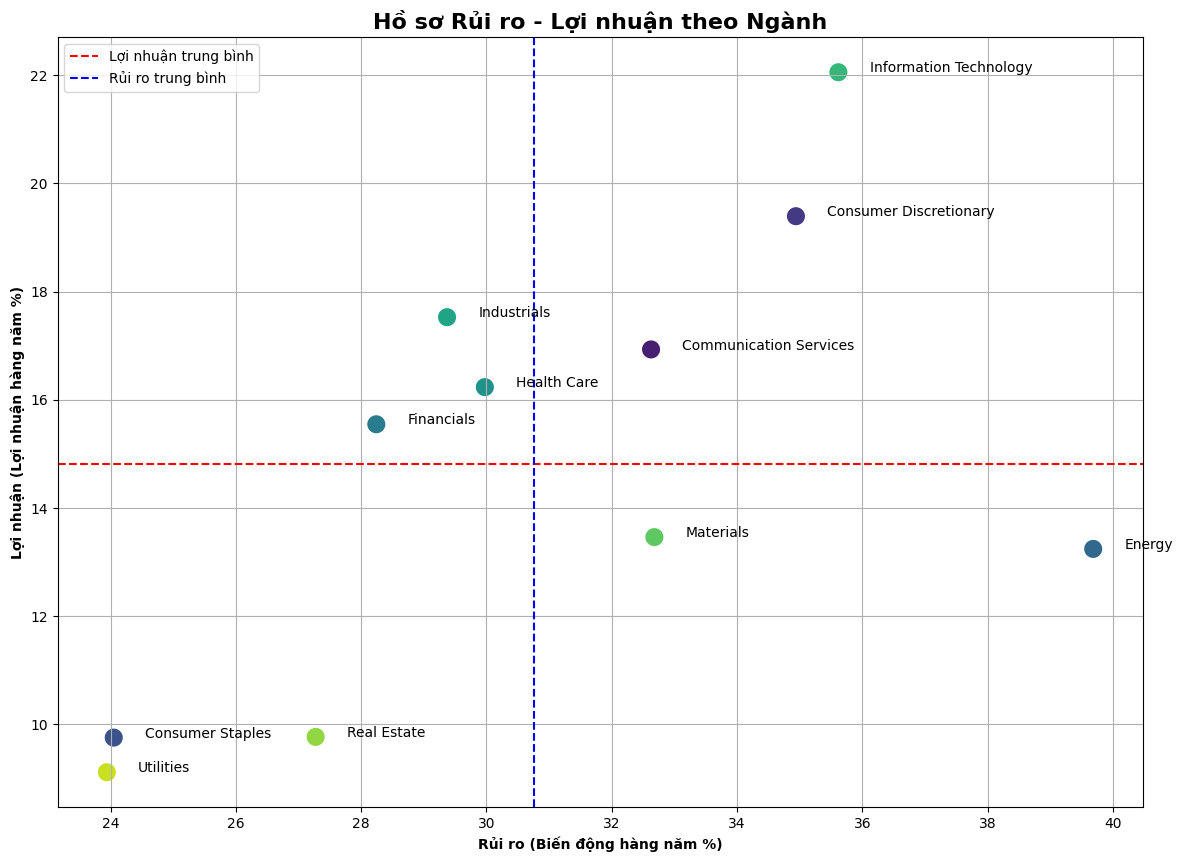

In [10]:
# Tính toán lợi nhuận và rủi ro trung bình hàng năm cho mỗi ngành
# 252 là số ngày giao dịch trung bình trong một năm
sector_stats = df.groupby('GICS Sector')['daily_return'].agg(['mean', 'std'])
sector_stats['Annualized Return (%)'] = sector_stats['mean'] * 252 * 100
sector_stats['Annualized Volatility (%)'] = sector_stats['std'] * np.sqrt(252) * 100

plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=sector_stats,
    x='Annualized Volatility (%)',
    y='Annualized Return (%)',
    s=200, # Kích thước điểm
    hue=sector_stats.index,
    palette='viridis',
    legend=False
)

# Thêm nhãn cho từng điểm
for i, sector in enumerate(sector_stats.index):
    plt.text(
        x=sector_stats['Annualized Volatility (%)'][i] + 0.5,
        y=sector_stats['Annualized Return (%)'][i],
        s=sector,
        fontdict=dict(color='black', size=10)
    )

plt.title('Hồ sơ Rủi ro - Lợi nhuận theo Ngành', fontsize=16, fontweight='bold')
plt.xlabel('Rủi ro (Biến động hàng năm %)', fontweight='bold')
plt.ylabel('Lợi nhuận (Lợi nhuận hàng năm %)', fontweight='bold')
plt.axhline(y=sector_stats['Annualized Return (%)'].mean(), color='r', linestyle='--', label='Lợi nhuận trung bình')
plt.axvline(x=sector_stats['Annualized Volatility (%)'].mean(), color='b', linestyle='--', label='Rủi ro trung bình')
plt.legend()
plt.grid(True)
plt.show()

# PHÂN TÍCH TƯƠNG QUAN ĐỘNG

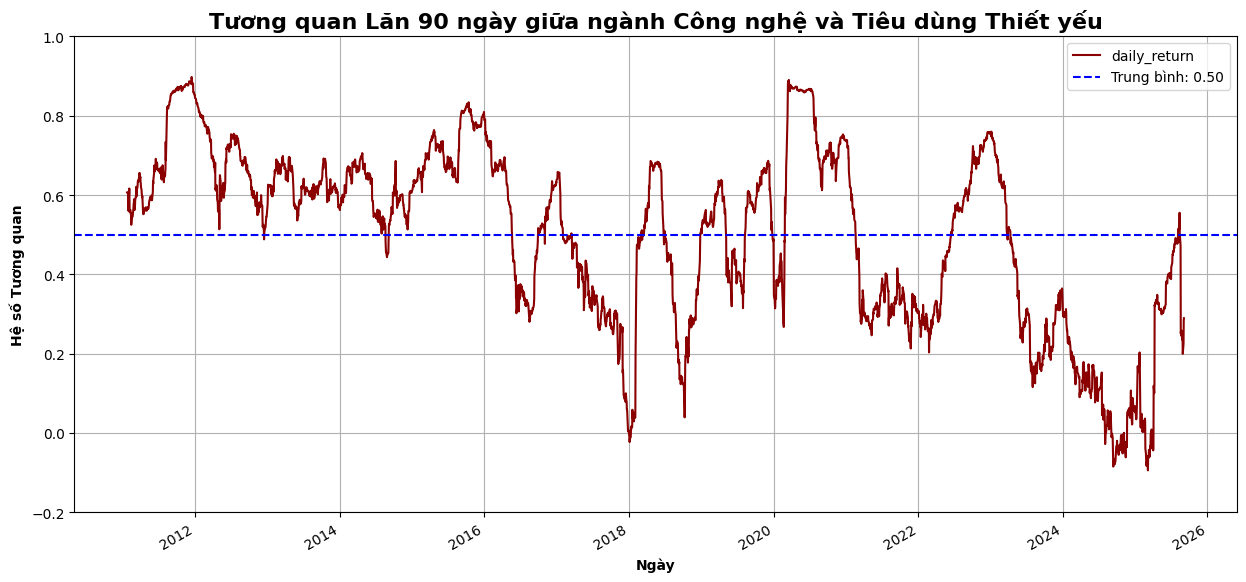

In [11]:
# Chọn 2 ngành tiêu biểu: Công nghệ (XLK) và Tiêu dùng thiết yếu (XLP)
df_tech = df[df['GICS Sector'] == 'Information Technology'].groupby('Date')['daily_return'].mean()
df_staples = df[df['GICS Sector'] == 'Consumer Staples'].groupby('Date')['daily_return'].mean()

# Tính tương quan lăn 90 ngày
rolling_corr_sector = df_tech.rolling(window=90).corr(df_staples)

plt.figure(figsize=(15, 7))
rolling_corr_sector.plot(color='darkred')
plt.title('Tương quan Lăn 90 ngày giữa ngành Công nghệ và Tiêu dùng Thiết yếu', fontsize=16, fontweight='bold')
plt.xlabel('Ngày', fontweight='bold')
plt.ylabel('Hệ số Tương quan', fontweight='bold')
plt.axhline(rolling_corr_sector.mean(), color='blue', linestyle='--', label=f'Trung bình: {rolling_corr_sector.mean():.2f}')
plt.ylim(-0.2, 1.0)
plt.legend()
plt.grid(True)
plt.show()
